In [37]:
import  numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import tools_higgs_boson as tools

sns.set()
np.random.seed(0)

In [38]:
train_df = pd.read_csv ("Data/training.csv")
test_df  = pd.read_csv ("Data/test.csv")

training_df = train_df.drop(['EventId' ], axis = 1)  

In [18]:
Y = np.array ( train_df['Label'] )
Y = (Y == 's').astype(np.int8)

# raw data baselines

In [27]:
X = training_df.values[:,:-1]


X_train, X_valid , Y_train, Y_valid = train_test_split( X , Y , test_size=0.5 , random_state=2 )

## KNN

In [23]:
neigh = KNeighborsClassifier(n_neighbors=6,n_jobs=-1)

neigh.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [23]:
# make predictions
print ( "train : ", accuracy_score( Y_train , neigh.predict(X_train)   ) )
print ( "valid : ", accuracy_score( Y_valid , neigh.predict(X_valid)   ) )

train :  0.8477136842105263
valid :  0.80576


## Decision Tree

In [28]:
clf = DecisionTreeClassifier( random_state=0 , class_weight={ 1:0.34 , 0:0.56 } , max_depth = 9 )

clf.fit( X_train , Y_train )

DecisionTreeClassifier(class_weight={0: 0.56, 1: 0.34}, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [29]:
# make predictions
print ( "train : ", accuracy_score( Y_train , clf.predict(X_train)   ) )
print ( "valid : ", accuracy_score( Y_valid , clf.predict(X_valid)   ) )

train :  1.0
valid :  1.0


In [11]:
parameters = {'max_depth':[6,7,8,9,10,11,12,13,14,15] }
clf = DecisionTreeClassifier( random_state=0 , class_weight={ 1:0.34 , 0:0.56 }  )
clf = GridSearchCV(clf, parameters, cv=5 , return_train_score=True )

clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={0: 0.56, 1: 0.34},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True

In [12]:
results   = { k : clf.cv_results_[k] for k in ['params','mean_test_score' , 'mean_train_score' ,'rank_test_score'] }
pd.DataFrame(results)

,params,mean_test_score,mean_train_score,rank_test_score
0,{'max_depth': 6},0.806400,0.808466,9
1,{'max_depth': 7},0.803740,0.807111,10
2,{'max_depth': 8},0.811704,0.817926,6
3,{'max_depth': 9},0.815500,0.825307,1
4,{'max_depth': 10},0.815360,0.830236,2
5,{'max_depth': 11},0.815064,0.838036,3
6,{'max_depth': 12},0.812548,0.845003,5
7,{'max_depth': 13},0.812932,0.857409,4
8,{'max_depth': 14},0.810116,0.869125,7
9,{'max_depth': 15},0.808124,0.881565,8


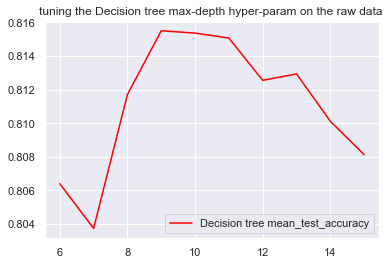

In [14]:


plt.plot( [6,7,8,9,10,11,12,13,14,15] , results['mean_test_score'] , color="red" , label="Decision tree mean_test_accuracy" )
plt.title("tuning the Decision tree max-depth hyper-param on the raw data ")
plt.legend()

plt.show()

## Logistic regression

In [49]:
clf = LogisticRegression( random_state=0 , solver='lbfgs', max_iter=1000 , tol=0.001 , C = 100 ,n_jobs=-1  )

clf.fit(X_train,Y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.001, verbose=0, warm_start=False)

In [51]:
# make predictions
print ( "train : ", accuracy_score( Y_train , clf.predict(X_train)   ) )
print ( "valid : ", accuracy_score( Y_valid , clf.predict(X_valid)   ) )

train :  0.7392505263157895
valid :  0.73544


## SVM 

Very long time 

## Random Forest

In [58]:
clf = RandomForestClassifier( n_estimators=100  ,random_state=0 , n_jobs=-1 , max_depth= 11 )

In [59]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
# make predictions
print ( "train : ", accuracy_score( Y_train , clf.predict(X_train)   ) )
print ( "valid : ", accuracy_score( Y_valid , clf.predict(X_valid)   ) )

train :  0.847178947368421
valid :  0.83456


In [62]:
parameters = {'max_depth':[6,7,8,9,10,11,12,13,14,15] }
clf = RandomForestClassifier( n_estimators=100  ,random_state=0 , n_jobs=-1 )
clf = GridSearchCV(clf, parameters, cv=5 , return_train_score=True , n_jobs=-1 )

clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_dept

In [63]:
results   = { k : clf.cv_results_[k] for k in ['params','mean_test_score' , 'mean_train_score' ,'rank_test_score'] }
pd.DataFrame(results)

,params,mean_test_score,mean_train_score,rank_test_score
0,{'max_depth': 6},0.819208,0.821100,10
1,{'max_depth': 7},0.823572,0.825989,9
2,{'max_depth': 8},0.826392,0.830366,8
3,{'max_depth': 9},0.829124,0.835416,7
4,{'max_depth': 10},0.831304,0.841253,6
5,{'max_depth': 11},0.833012,0.848524,5
6,{'max_depth': 12},0.834472,0.857361,4
7,{'max_depth': 13},0.835432,0.867694,3
8,{'max_depth': 14},0.837096,0.880359,2
9,{'max_depth': 15},0.837360,0.894807,1


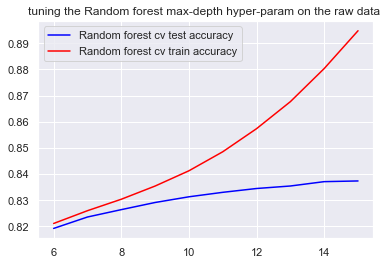

In [66]:
plt.plot( [6,7,8,9,10,11,12,13,14,15] , results['mean_test_score'] , color="blue" , label="Random forest cv test accuracy" )
plt.plot( [6,7,8,9,10,11,12,13,14,15] , results['mean_train_score'] , color="red" , label="Random forest cv train accuracy" )

plt.title("tuning the Random forest max-depth hyper-param on the raw data ")
plt.legend()

plt.show()

## Adaboost

In [71]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0 , learning_rate= 1 )

clf.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=0)

In [72]:
# make predictions
print ( "train : ", accuracy_score( Y_train , clf.predict(X_train)   ) )
print ( "valid : ", accuracy_score( Y_valid , clf.predict(X_valid)   ) )

train :  0.81816
valid :  0.81904


## XGBoost

In [81]:
from xgboost import XGBClassifier


model = XGBClassifier(n_jobs=-1)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
# make predictions
print ( "train : ", accuracy_score( Y_train , model.predict(X_train)   ) )
print ( "valid : ", accuracy_score( Y_valid , model.predict(X_valid)   ) )

train :  0.8325936842105263
valid :  0.8304


## LightGBM

In [102]:


d_train = lgb.Dataset(X_train, label=Y_train)

evals_result = {}  # to record eval results for plotting
params = {}
params['learning_rate'] = 0.25
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['early_stopping_round '] = 5


clf = lgb.train(params ,
                d_train,
                100 ,
                feature_name=[ training_df.columns[i] for i in range(X_train.shape[-1])]  )

In [103]:
# make predictions
print ( "train : ", accuracy_score( Y_train , ( clf.predict(X_train) >=0.5 ).astype("int8") ) )
print ( "valid : ", accuracy_score( Y_valid , ( clf.predict(X_valid) >=0.5 ).astype("int8")   ) )

train :  0.8520294736842106
valid :  0.84016


Plotting feature importances...


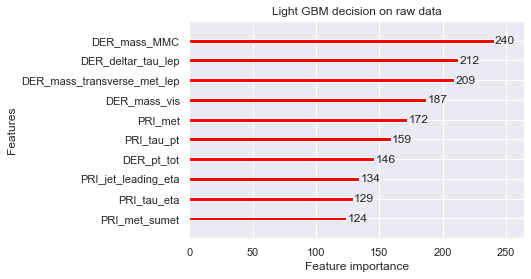

In [104]:
print('Plotting feature importances...')
ax = lgb.plot_importance(clf, max_num_features=10 , color='red' , title='Light GBM decision on raw data' )
plt.show()

In [105]:
# make predictions
print ( "train : ", accuracy_score( Y_train , ( clf.predict(X_train) >=0.5 ).astype("int8") ) )
print ( "valid : ", accuracy_score( Y_valid , ( clf.predict(X_valid) >=0.5 ).astype("int8")   ) )

train :  0.8520294736842106
valid :  0.84016


## With manual feature selection

In [5]:
selected_features = ["DER_mass_MMC" ,"DER_deltar_tau_lep", "DER_mass_transverse_met_lep","DER_mass_vis"  , "PRI_tau_pt" ]

selected_train_df =  train_df [selected_features]

selected_test_df  =  test_df  [selected_features]


X = selected_train_df.values

selected_train_df.head(5)

,DER_mass_MMC,DER_deltar_tau_lep,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt
0,138.470,3.064,51.655,97.827,32.638
1,160.937,3.473,68.768,103.235,42.014
2,-999.000,3.148,162.172,125.953,32.154
3,143.905,3.310,81.417,80.943,22.647
4,175.864,3.891,16.915,134.805,28.209


In [6]:
X_train, X_valid , Y_train, Y_valid = train_test_split( X , Y , test_size=0.05 , random_state=2 )

In [95]:
d_train = lgb.Dataset(X_train, label=Y_train)

evals_result = {}  # to record eval results for plotting
params = {}
params['learning_rate'] = 0.4
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['early_stopping_round '] = 5


clf = lgb.train(params ,
                d_train,
                100 ,
                feature_name=[ selected_train_df.columns[i] for i in range(X_train.shape[-1])]  )

Plotting feature importances...


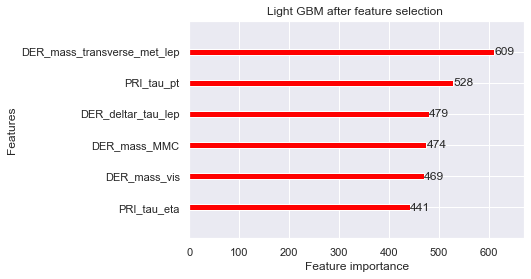

In [96]:
print('Plotting feature importances...')
ax = lgb.plot_importance(clf, max_num_features=10 , color='red' , title='Light GBM after feature selection ' )
plt.show()

In [97]:
# make predictions
print ( "train : ", accuracy_score( Y_train , ( clf.predict(X_train) >=0.5 ).astype("int8") ) )
print ( "valid : ", accuracy_score( Y_valid , ( clf.predict(X_valid) >=0.5 ).astype("int8")   ) )

train :  0.8315789473684211
valid :  0.82352


**SVM**

In [14]:
clf = SVC( gama ='scale' , kernel='rbf' , random_state=0 , max_iter=1000  , C = 0.1  )

clf.fit(X_train,Y_train)

C:\Users\raouf\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\raouf\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=1000, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
# make predictions
print ( "train : ", accuracy_score( Y_train , clf.predict(X_train)   ) )
print ( "valid : ", accuracy_score( Y_valid , clf.predict(X_valid)   ) )

train :  0.6577557894736842
valid :  0.65448
